# Project – Analyzing Naming Trends

## Industry: General

## Problem Statement:
The dataset is in zipped format. We have to extract the dataset in the program,
visualize the number of male and female babies born in a particular year, and
find out popular baby names.

## Description:
This project not only focuses on implementing data manipulation and data
visualization using pandas library but also tests your ability to deal with real word
problem statements.

## Dataset:
Popular baby names data provided by the Social Security Administration (SSA)
of the United States.
https://www.ssa.gov/oact/babynames/limits.html

---

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from zipfile import ZipFile
from io import BytesIO

In [114]:
# Step 1: Read the zip archive and extract data into a DataFrame
all_dataframes = []
with ZipFile('names.zip', 'r') as z:
    for filename in z.namelist():
        if filename.startswith('yob') and filename.endswith('.txt'):
            year = int(filename[3:7])
            one_df = pd.read_csv(BytesIO(z.read(filename)), names=['Name', 'Gender', 'Count'])
            one_df['Year'] = year
            all_dataframes.append(one_df)

# Combine all DataFrames into a single DataFrame
df = pd.concat(all_dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(df.head())

# Print the minimum and maximum years
print('Min Year:', df['Year'].min())
print('Max Year:', df['Year'].max())


        Name Gender  Count  Year
0       Mary      F   7065  1880
1       Anna      F   2604  1880
2       Emma      F   2003  1880
3  Elizabeth      F   1939  1880
4     Minnie      F   1746  1880
Min Year: 1880
Max Year: 2022


In [115]:
df

,Name,Gender,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


In [137]:

agg_af_gender_count

,Gender,Total_Count
0,F,180680711
1,M,184615480


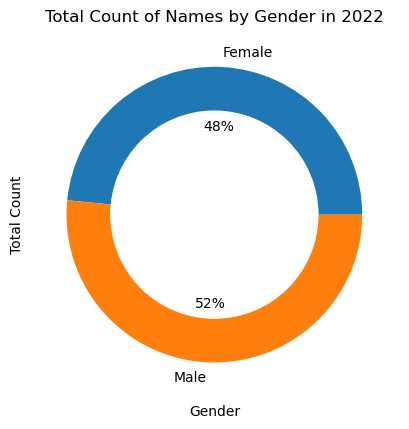

In [144]:
year = 2022
agg_af_gender_count = df[df['Year'] == year].groupby('Gender').agg(Total_Count=('Count','sum')).reset_index()

plt.pie(agg_af_gender_count['Total_Count'], labels=['Female', 'Male'], autopct='%1.0f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(f'Total Count of Names by Gender in {year}')
plt.xlabel('Gender')
plt.ylabel('Total Count')

plt.show()

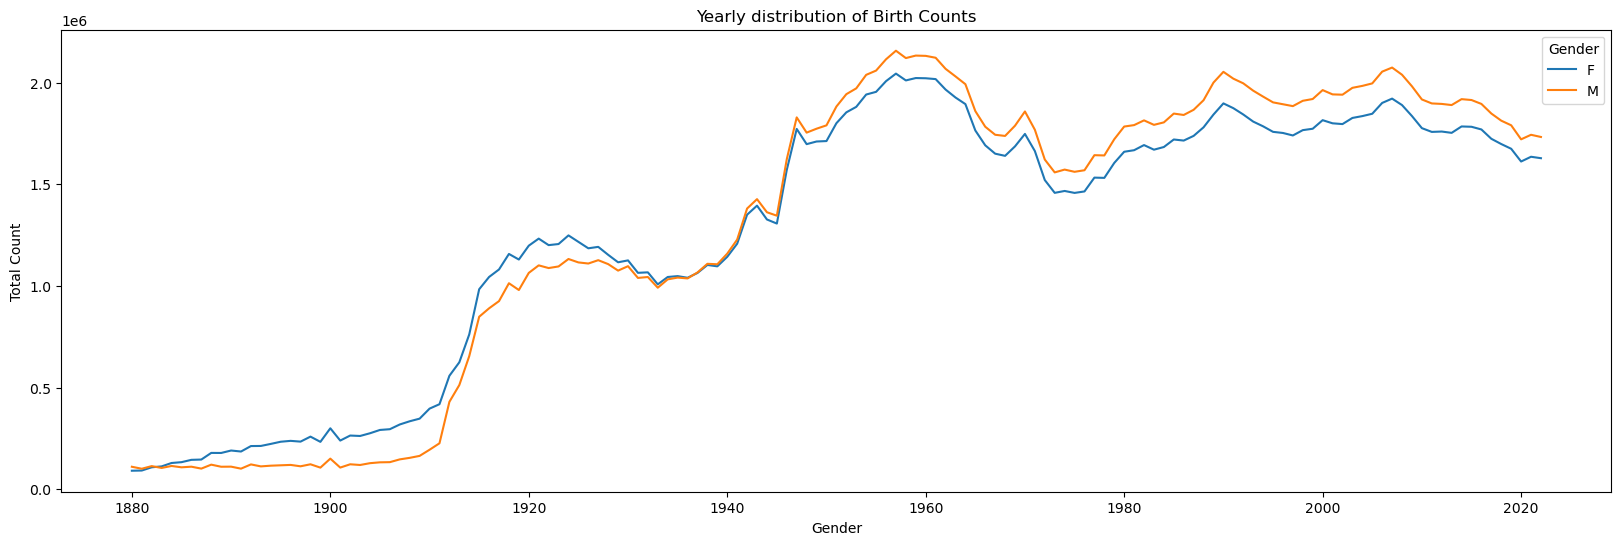

In [118]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df.groupby(['Year','Gender']).agg(Total_Count=('Count', 'sum')).reset_index(), x='Year', y='Total_Count', hue='Gender')
plt.title(f'Yearly distribution of Birth Counts')
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.show()

In [134]:
agg_df_name_count = df.groupby('Name').agg(Total_Count=('Count','sum')).reset_index().sort_values('Total_Count', ascending=False)
agg_df_name_count

,Name,Total_Count
40753,James,5238523
45224,John,5180158
79007,Robert,4858239
66368,Michael,4423430
97851,William,4183494
...,...,...
74008,Parizay,5
74005,Parita,5
86808,Siovhan,5
92617,Tilon,5


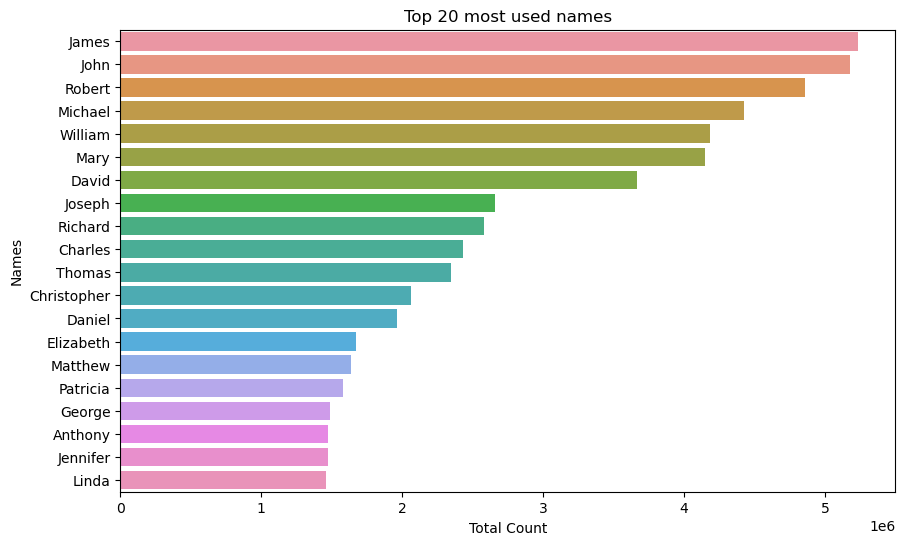

In [135]:
plt.figure(figsize=(10,6))
sns.barplot(data=agg_df_name_count.head(20), y='Name', x='Total_Count', orient="h")
plt.title(f'Top 20 most used names')
plt.ylabel('Names')
plt.xlabel('Total Count')
plt.show()

In [125]:
agg_df_name_count_hundred = df.sort_values('Count', ascending=False).head(100).groupby('Name').agg(Total_Count=('Count','sum')).sort_values('Total_Count', ascending=False).reset_index()
agg_df_name_count_hundred

,Name,Total_Count
0,James,1808577
1,Michael,1768220
2,John,1525040
3,Robert,1467473
4,David,978124
5,Linda,441337
6,Mary,219694


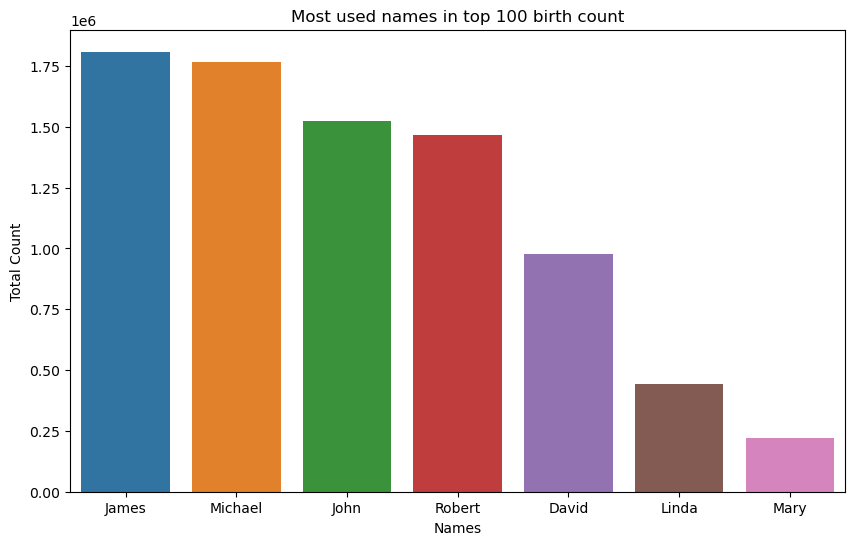

In [126]:
plt.figure(figsize=(10,6))
sns.barplot(data=agg_df_name_count_hundred, x='Name', y='Total_Count')
plt.title(f'Most used names in top 100 birth count')
plt.xlabel('Names')
plt.ylabel('Total Count')
plt.show()